In [4]:
!pip install yfinance
!pip install tqdm
from tqdm.notebook import tqdm
import yfinance as yf
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
from statsmodels.multivariate.pca import PCA
from statsmodels.multivariate.factor import Factor
from statsmodels.multivariate.factor_rotation import rotate_factors
from scipy import stats
from scipy.stats import kurtosis

In [6]:
data_mygrp = pd.read_csv("my_group_data.csv")
data_p = data_mygrp.iloc[: , 1:]
data = np.log(data_p[:]).diff() * 100
data = data[1:]  
data

,SEK.AX,TLS.AX,WOW.AX,WBC.AX,BHP.AX,CBA.AX,CPU.AX,WES.AX
1,2.332449,-0.290231,-0.606161,0.826615,0.463186,1.501333,-1.046218,1.303018
2,-2.775910,-1.759583,-0.178999,-0.471491,1.239974,0.501419,-0.527200,-1.495173
3,1.616499,-1.791093,-0.215203,-1.348169,-0.114186,-0.969303,-0.441541,-1.615539
4,-1.025644,1.791093,0.858046,0.398427,-0.343242,1.290363,1.841346,2.445409
5,-2.083416,-0.891540,-0.320900,0.119174,1.929853,0.727416,1.637256,0.285708
...,...,...,...,...,...,...,...,...
3180,-1.597276,0.000000,1.120242,1.557522,-1.338835,0.876640,0.315706,1.738800
3181,0.866557,-0.505052,-1.303794,-1.142870,0.077719,-1.481950,0.824024,-1.099143
3182,3.684513,1.257876,-1.081948,0.458718,-1.146148,1.315096,0.972204,-0.106323
3183,-2.228382,0.995028,1.892306,0.502164,1.662817,-0.383839,-1.520795,1.478381


## Section 1

### Question 1

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
pca_results = pca.fit_transform(data)
pca_results = pd.DataFrame(pca_results)
pca_results.columns = list(map(lambda x: 'com_'+str(x+1), range(8)))
pca_results # PCA result


,com_1,com_2,com_3,com_4,com_5,com_6,com_7,com_8
0,-1.863465,1.276017,0.277924,-1.622758,1.393210,-0.078026,1.143867,-0.629715
1,1.978754,-2.663142,-1.272415,0.002813,0.987100,-1.023380,-0.700281,-0.827712
2,1.277834,1.981825,-1.970495,-0.646992,0.173860,-1.017675,-0.862113,-0.180741
3,-1.881898,-1.270525,2.087182,1.695621,-1.297612,0.426000,1.134780,-0.535138
4,-0.443654,-2.750442,-1.379597,1.255901,0.152591,-0.606862,0.558419,-0.555917
...,...,...,...,...,...,...,...,...
3179,-0.424999,-1.210542,2.640016,1.201231,0.499042,-0.932569,0.635257,0.432784
3180,1.022323,1.299577,-2.183445,0.539752,-0.427955,0.485697,0.009145,0.314831
3181,-2.216979,3.286497,0.123566,0.354267,0.790821,1.727873,-0.093366,-0.760111
3182,-0.052172,-3.046187,1.453715,-1.702184,-1.326170,-0.585698,0.245436,0.866505


In [8]:
pca.explained_variance_ratio_  # percentage of the total variance


array([0.47742374, 0.13658312, 0.10063475, 0.09718306, 0.07468448,
       0.05735493, 0.03712413, 0.01901179])

### Question 2
I would choose **four** principal component. Because the proportion of the first four principal components are as high as 80%, which is far more than the proportion of other principal components, so choosing only one principal component will have better explanatory power.

### Question 3

In [9]:
pca = PCA(n_components=4)
pca_results1 = pca.fit_transform(data)
pca_results1 = pd.DataFrame(pca_results1)
pca_results1.columns = list(map(lambda x: 'com_'+str(x+1), range(4)))
pca_results1  # PCA result


,com_1,com_2,com_3,com_4
0,-1.863465,1.276017,0.277924,-1.622758
1,1.978754,-2.663142,-1.272415,0.002813
2,1.277834,1.981825,-1.970495,-0.646992
3,-1.881898,-1.270525,2.087182,1.695621
4,-0.443654,-2.750442,-1.379597,1.255901
...,...,...,...,...
3179,-0.424999,-1.210542,2.640016,1.201231
3180,1.022323,1.299577,-2.183445,0.539752
3181,-2.216979,3.286497,0.123566,0.354267
3182,-0.052172,-3.046187,1.453715,-1.702184


In [10]:
pca_results1.describe() # Discribe

,com_1,com_2,com_3,com_4
count,3.184000e+03,3.184000e+03,3.184000e+03,3.184000e+03
mean,1.436595e-17,-2.998718e-17,1.743441e-17,8.316212e-18
std,2.919480e+00,1.561536e+00,1.340379e+00,1.317191e+00
min,-2.108806e+01,-1.160859e+01,-7.107626e+00,-7.849376e+00
25%,-1.616773e+00,-8.461701e-01,-7.458559e-01,-7.590153e-01
50%,-9.630600e-02,-3.263843e-03,-2.547219e-03,-3.460514e-02
75%,1.466407e+00,8.276430e-01,7.570436e-01,6.989494e-01
max,2.511091e+01,1.295860e+01,8.459279e+00,1.246795e+01


### Question 4

Let the covariance matrix corresponding to the original data matrix Y be C, and P is a set of matrixes composed of rows by basis, and let X=PY, then X is the data after the basis transformation of Y on P. Let the covariance matrix of X be D, let us derive the relationship between D and C:

$$\begin{aligned} D &=\frac{1}{m} Y Y^T \\ &=\frac{1}{m}(P X)(P X)^T \\ &=\frac{1}{m} P X X^T P^T \\ &=P\left(\frac{1}{m} X X^T\right) P^T \\ &=P C P^T \end{aligned}$$

This makes it clear that the P we are looking for is the P that diagonalizes the original covariance matrix. In other words, the optimization goal becomes to find a matrix P, satisfying that $PCP^T$ is a diagonal matrix, and the diagonal elements are arranged in descending order, then the first K rows of P are the basis to be found, and the first K rows of P are the basis to be found. The matrix consisting of K rows is multiplied by X to reduce X from N dimension to K dimension and satisfy the above optimization conditions.

Therefore, we know that the covariance matrix of the matrix X of the PCA corresponding to Y is a diagonal diagonal matrix. That is, each column of X is orthogonal.

Therefore, it can also be proved that the first two PCs of Y are orthogonal, that is, the covariance is 0.

# Section 1 q5-q11

In [11]:
# Sample covariance matrix 
data.cov()

,SEK.AX,TLS.AX,WOW.AX,WBC.AX,BHP.AX,CBA.AX,CPU.AX,WES.AX
SEK.AX,3.772920,0.585890,0.676341,1.156163,1.020527,1.069322,1.262719,0.999922
TLS.AX,0.585890,1.469148,0.490053,0.563594,0.531268,0.571643,0.470539,0.612652
WOW.AX,0.676341,0.490053,1.508071,0.645225,0.649254,0.686684,0.545398,0.822275
WBC.AX,1.156163,0.563594,0.645225,2.120889,1.154611,1.524452,1.074878,0.908975
BHP.AX,1.020527,0.531268,0.649254,1.154611,3.023784,1.025025,1.043888,0.773331
CBA.AX,1.069322,0.571643,0.686684,1.524452,1.025025,1.668053,0.942541,0.887067
CPU.AX,1.262719,0.470539,0.545398,1.074878,1.043888,0.942541,2.724947,0.779447
WES.AX,0.999922,0.612652,0.822275,0.908975,0.773331,0.887067,0.779447,1.565015


In [12]:
'''
Biplot for a given weight matrix
'''
def biplot(weight):
    ax = plt.axes()
    for i in range(weight.shape[0]):
        w = weight[i, :]
        ax.plot([0, w[0]], [0, w[1]])
        ax.scatter(w[0], w[1])
    ax.axhline(y=0, color='k', alpha=0.6)
    ax.axvline(x=0, color='k', alpha=0.6)
    lim = np.max(np.abs(weight[:, :2]))
    lim = lim + 0.1 * lim
    ax.axis([-lim, lim, -lim, lim])
    ax.grid(True)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    return ax

'''
3D biplot for a given weight matrix
'''
def biplot3d(weight):
    ax = plt.axes(projection="3d")
    for i in range(weight.shape[0]):
        w = weight[i, :]
        ax.plot([0, w[0]], [0, w[1]], [0, w[2]])
        ax.scatter(w[0], w[1], w[2])
    lim = np.max(np.abs(weight[:, :3]))
    lim = lim + 0.1 * lim
    ax.axis([-lim, lim, -lim, lim])
    ax.set_zbound(lower=-lim, upper=lim)
    ax.plot([-lim, lim], [0, 0], [0, 0], 'k', alpha=0.6)
    ax.plot([0, 0], [-lim, lim], [0, 0], 'k', alpha=0.6)
    ax.plot([0, 0], [0, 0], [-lim, lim], 'k', alpha=0.6)
    ax.grid(True)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    return ax

In [13]:
#1- factor Model

fm1 = Factor(endog=data, n_factor=1, method='ml')
result1 = fm1.fit()

In [14]:
# Standardised factor loadings
result1.loadings

array([[0.5080848 ],
       [0.42828534],
       [0.50320774],
       [0.86229582],
       [0.53440925],
       [0.89935846],
       [0.5296242 ],
       [0.64071428]])

In [15]:
# Specific error variances, for standardised data
result1.uniqueness

array([0.74185006, 0.81657162, 0.7467816 , 0.25644552, 0.71440633,
       0.19115405, 0.7194984 , 0.58948512])

In [16]:
ser2 = result1.uniqueness * data.var()    # rescaled uniqueness for actual data
tbl_var = pd.DataFrame({'SER2' : ser2.round(4),
                       'S2': data.var().round(4)})
tbl_var.T

,SEK.AX,TLS.AX,WOW.AX,WBC.AX,BHP.AX,CBA.AX,CPU.AX,WES.AX
SER2,2.7989,1.1997,1.1262,0.5439,2.1602,0.3189,1.9606,0.9226
S2,3.7729,1.4691,1.5081,2.1209,3.0238,1.6681,2.7249,1.5650


In [17]:
ser = np.sqrt(ser2)
r2 = result1.communality 
tbl_r = pd.DataFrame({'r2': r2.round(4),
                      'SER' : ser.round(4),
                      's': data.std().round(4)})
tbl_r.T

,SEK.AX,TLS.AX,WOW.AX,WBC.AX,BHP.AX,CBA.AX,CPU.AX,WES.AX
r2,0.2581,0.1834,0.2532,0.7436,0.2856,0.8088,0.2805,0.4105
SER,1.6730,1.0953,1.0612,0.7375,1.4698,0.5647,1.4002,0.9605
s,1.9424,1.2121,1.2280,1.4563,1.7389,1.2915,1.6507,1.2510


In [18]:
# overall amount of variance captured 
(np.trace(data.cov()) - np.sum(ser2)) / np.trace(data.cov()) *100

38.211965363227165

In [19]:
score = result1.factor_scoring(method='regression', transform=True)
corr_f = data.copy()
corr_f['Score'] = score
corr_f.corr()['Score'][:8]

SEK.AX    0.534081
TLS.AX    0.450199
WOW.AX    0.528954
WBC.AX    0.906415
BHP.AX    0.561752
CBA.AX    0.945374
CPU.AX    0.556722
WES.AX    0.673497
Name: Score, dtype: float64

In [20]:
tbl_corr = pd.DataFrame({'Correlation' : corr_f.corr()['Score'][:8].round(4),
                      'Loading': (result1.loadings[:, 0] * data.std()).round(4),
                      'r2': r2.round(4)})
tbl_corr.T

,SEK.AX,TLS.AX,WOW.AX,WBC.AX,BHP.AX,CBA.AX,CPU.AX,WES.AX
Correlation,0.5341,0.4502,0.5290,0.9064,0.5618,0.9454,0.5567,0.6735
Loading,0.9869,0.5191,0.6180,1.2558,0.9293,1.1615,0.8743,0.8015
r2,0.2581,0.1834,0.2532,0.7436,0.2856,0.8088,0.2805,0.4105


There is a statistical test comparing the sample covariance matrix to the var- cov matrix estimated using the loadings and specific variances, under the ML estimation method.

T is the total number of rows in the matrix and m is the number of factor. N is the number of columns in the matrix.

The test statistic is:
$$LR(m) = -[T - 1 - \frac{2n + 5}{6} - \frac{2m}{3}]\left(\ln\lvert \hat{\Sigma} \rvert - \ln \lvert\hat{\beta}\hat{\beta}'+\hat{\Psi}\rvert\right) $$
which, under a null hypothesis that the number of factors equals m, follows a chi-squared distribution with $0.5[(n − m)^2 − n − m]$ degrees of freedom.

Also it worths to mention that P-value calculated by chi-squared test is at 5% significance level which could be used as an indicator to show if rejection of null hypothesis.

In [21]:
tbl_corr = pd.DataFrame({'Correlation' : corr_f.corr()['Score'][:8].round(4),
                      'Loading': (result1.loadings[:, 0] * data.std()).round(4),
                      'r2': r2.round(4)})
tbl_corr.T

,SEK.AX,TLS.AX,WOW.AX,WBC.AX,BHP.AX,CBA.AX,CPU.AX,WES.AX
Correlation,0.5341,0.4502,0.5290,0.9064,0.5618,0.9454,0.5567,0.6735
Loading,0.9869,0.5191,0.6180,1.2558,0.9293,1.1615,0.8743,0.8015
r2,0.2581,0.1834,0.2532,0.7436,0.2856,0.8088,0.2805,0.4105


In [22]:
# show fitted correlation matrix using factor loadings and uniquenesss for statndardised data
result1.fitted_cov

array([[1.00000022, 0.21760527, 0.2556722 , 0.4381194 , 0.27152522,
        0.45695036, 0.26909401, 0.32553719],
       [0.21760527, 0.99999995, 0.2155165 , 0.36930865, 0.22887965,
        0.38518204, 0.22683028, 0.27440853],
       [0.2556722 , 0.2155165 , 0.99999964, 0.43391393, 0.26891887,
        0.45256414, 0.266511  , 0.32241239],
       [0.4381194 , 0.36930865, 0.43391393, 0.99999959, 0.46081886,
        0.77551304, 0.45669273, 0.55248524],
       [0.27152522, 0.22887965, 0.26891887, 0.46081886, 0.99999958,
        0.48062548, 0.28303607, 0.34240364],
       [0.45695036, 0.38518204, 0.45256414, 0.77551304, 0.48062548,
        0.99999969, 0.47632201, 0.57623181],
       [0.26909401, 0.22683028, 0.266511  , 0.45669273, 0.28303607,
        0.47632201, 1.00000019, 0.33933779],
       [0.32553719, 0.27440853, 0.32241239, 0.55248524, 0.34240364,
        0.57623181, 0.33933779, 0.99999991]])

In [23]:
x = (data - data.mean()) / data.std()
x.cov()

,SEK.AX,TLS.AX,WOW.AX,WBC.AX,BHP.AX,CBA.AX,CPU.AX,WES.AX
SEK.AX,1.000000,0.248854,0.283541,0.408716,0.302142,0.426250,0.393812,0.411498
TLS.AX,0.248854,1.000000,0.329230,0.319282,0.252061,0.365163,0.235171,0.404038
WOW.AX,0.283541,0.329230,1.000000,0.360779,0.304038,0.432953,0.269044,0.535238
WBC.AX,0.408716,0.319282,0.360779,1.000000,0.455933,0.810494,0.447117,0.498923
BHP.AX,0.302142,0.252061,0.304038,0.455933,1.000000,0.456409,0.363663,0.355493
CBA.AX,0.426250,0.365163,0.432953,0.810494,0.456409,1.000000,0.442096,0.549025
CPU.AX,0.393812,0.235171,0.269044,0.447117,0.363663,0.442096,1.000000,0.377440
WES.AX,0.411498,0.404038,0.535238,0.498923,0.355493,0.549025,0.377440,1.000000


In [24]:
ll = np.log(np.linalg.det(x.cov())) - np.log(np.linalg.det(result1.fitted_cov))

In [25]:
m = 1
T = data.shape[0]
n = data.shape[1]
lr = -(T - 1 - (2 * n + 5) / 6 - 2 * m / 3) * ll
lr

967.9602831509933

In [26]:
df = 0.5 * ((n - m) **2 - (n - m)) 
df

21.0

In [27]:
stats.chi2.sf(lr, df)

1.8629940230393437e-191

In [28]:
fm2 = Factor(endog=data, n_factor=2, method='ml')
result2 = fm2.fit()

In [29]:
result2.loadings

array([[ 0.49920246,  0.17770483],
       [ 0.42045839,  0.27988231],
       [ 0.50034281,  0.42978569],
       [ 0.9067052 , -0.21103147],
       [ 0.52611929,  0.08205594],
       [ 0.88155005, -0.04627889],
       [ 0.52181313,  0.10437264],
       [ 0.65211009,  0.45883578]])

### Question 5

The table below indicates the actual factor loadings, showing how much each factor relates to each variable after getting standardized. Factor loading refers to the beta which could be changed on different assets and factors remains the same for each asset. Specific error variances (SER) gets standarized to show how much variance can not be explained by model. Commonality captures the common variance. 

The actual loading for Factor 1 is mostly postive except for BHP, showing it closed to market trend. Actual loadings for Factor 2 show negetive values for all assets which has a contrasting effect with market trend. 

In [30]:
# Actual loadings
tbl_loading2 = pd.DataFrame({'Factor 1': round(result2.loadings[:,0] * data.std(), 4),
                             'Factor 2': round(result2.loadings[:,1] * data.std(), 4)})
tbl_loading2

,Factor 1,Factor 2
SEK.AX,0.9697,0.3452
TLS.AX,0.5096,0.3392
WOW.AX,0.6144,0.5278
WBC.AX,1.3205,-0.3073
BHP.AX,0.9149,0.1427
CBA.AX,1.1385,-0.0598
CPU.AX,0.8614,0.1723
WES.AX,0.8158,0.5740


In [31]:
# Specific error variances
print(result2.uniqueness)
ser2_2 = result2.uniqueness * data.var()
ser2_2

[0.71921774 0.74488072 0.5649412  0.13335133 0.71646526 0.22072755
 0.71681743 0.364222  ]


SEK.AX    2.713551
TLS.AX    1.094340
WOW.AX    0.851972
WBC.AX    0.282823
BHP.AX    2.166436
CBA.AX    0.368185
CPU.AX    1.953290
WES.AX    0.570013
dtype: float64

In [32]:
tbl_var2 = pd.DataFrame({'m = 1': ser2.round(4),
                         'm = 2': ser2_2.round(4)})
tbl_var2.T

,SEK.AX,TLS.AX,WOW.AX,WBC.AX,BHP.AX,CBA.AX,CPU.AX,WES.AX
m = 1,2.7989,1.1997,1.1262,0.5439,2.1602,0.3189,1.9606,0.9226
m = 2,2.7136,1.0943,0.8520,0.2828,2.1664,0.3682,1.9533,0.5700


In [33]:
ser_2 = np.sqrt(ser2_2)
r2_2 = result2.communality 
tbl_r_2 = pd.DataFrame({'s': data.std().round(4),
                        'SER (m=1)' : ser.round(4),
                        'SER (m=2)' : ser_2.round(4),
                        'r2 (m=1)': r2.round(4),
                        'r2 (m=2)': r2_2.round(4)})
tbl_r_2.T

,SEK.AX,TLS.AX,WOW.AX,WBC.AX,BHP.AX,CBA.AX,CPU.AX,WES.AX
s,1.9424,1.2121,1.2280,1.4563,1.7389,1.2915,1.6507,1.2510
SER (m=1),1.6730,1.0953,1.0612,0.7375,1.4698,0.5647,1.4002,0.9605
SER (m=2),1.6473,1.0461,0.9230,0.5318,1.4719,0.6068,1.3976,0.7550
r2 (m=1),0.2581,0.1834,0.2532,0.7436,0.2856,0.8088,0.2805,0.4105
r2 (m=2),0.2808,0.2551,0.4351,0.8666,0.2835,0.7793,0.2832,0.6358


In [34]:
# overall amount of variance captured 
(np.trace(data.cov()) - np.sum(ser2_2)) / np.trace(data.cov()) *100

43.98304925440166

In [35]:
result2.fitted_cov

array([[0.99999984, 0.2596303 , 0.32614736, 0.41512816, 0.27722178,
        0.43184797, 0.27903792, 0.4070723 ],
       [0.2596303 , 1.00000008, 0.33066274, 0.32216784, 0.24417727,
        0.35770247, 0.24861276, 0.40260517],
       [0.32614736, 0.33066274, 0.99999987, 0.36296512, 0.29850647,
        0.42118722, 0.30594331, 0.52347965],
       [0.41512816, 0.32216784, 0.36296512, 0.99999994, 0.45971871,
        0.80907232, 0.45110477, 0.49444283],
       [0.27722178, 0.24417727, 0.29850647, 0.45971871, 0.99999995,
        0.46000303, 0.28310034, 0.3807379 ],
       [0.43184797, 0.35770247, 0.42118722, 0.80907232, 0.46000303,
        0.99999978, 0.45517414, 0.55363327],
       [0.27903792, 0.24861276, 0.30594331, 0.45110477, 0.28310034,
        0.45517414, 1.00000001, 0.3881695 ],
       [0.4070723 , 0.40260517, 0.52347965, 0.49444283, 0.3807379 ,
        0.55363327, 0.3881695 , 0.99999984]])

### Question 6

The factor loadings are mostly positive except for one and relatively similar in magnitude, suggesting the returns are similarly positively related to the underlying factor. This suggests the underlying 1st factor behaves like a market factor. The second factor loadings contain some negative values which shows it captures some negative returns. 

This interpretation is supported by the plot above showing that the estimated factors, in the middle plot, captures most of the up  movements that seem similar in 8 assets' return  series in the top plot. i.e. when most series have larger positive returns, the factor is also positive. The factor follows the general, shared mainly upwards movements of the 8 return series. 2nd Factor in the bottom plots then shows a contrasting effect compared to the first factor. It captures the opposite downwards movements that 8 log returns series contain. 

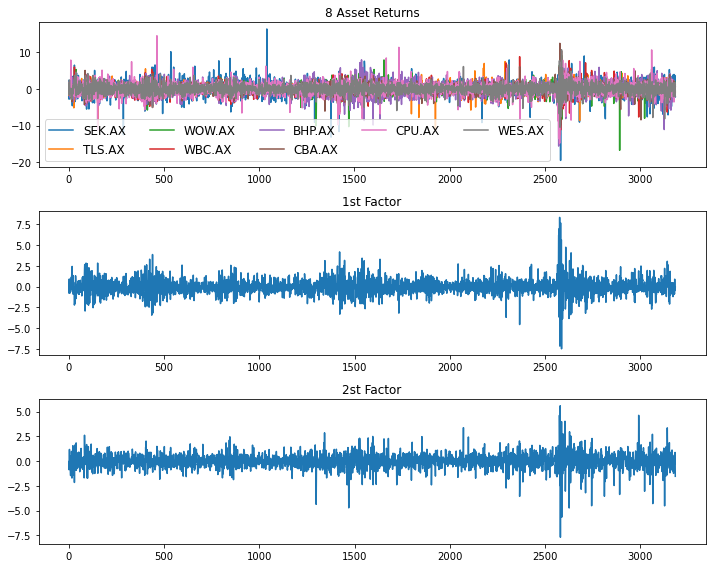

In [36]:
score_2 = result2.factor_scoring(method='regression', transform=True)
fig, ax = plt.subplots(3, 1, figsize=(10, 8))
data.plot(ax=ax[0])
ax[0].set_title('8 Asset Returns')
ax[0].legend(loc='best', ncol=5, fontsize=12)
ax[1].plot(score_2[:,0] * (-1))
ax[1].set_title('1st Factor')
ax[2].plot(score_2[:,1])
ax[2].set_title('2st Factor')
plt.tight_layout()
plt.show()

In [37]:
corr_f2 = data.copy()
corr_f2['Factor 1'] = score_2[:,0] *(-1)
corr_f2['Factor 2'] = score_2[:,1]
corr_f2.corr().iloc[:, :].round(4)

,SEK.AX,TLS.AX,WOW.AX,WBC.AX,BHP.AX,CBA.AX,CPU.AX,WES.AX,Factor 1,Factor 2
SEK.AX,1.0000,0.2489,0.2835,0.4087,0.3021,0.4263,0.3938,0.4115,-0.5186,0.2319
TLS.AX,0.2489,1.0000,0.3292,0.3193,0.2521,0.3652,0.2352,0.4040,-0.4368,0.3653
WOW.AX,0.2835,0.3292,1.0000,0.3608,0.3040,0.4330,0.2690,0.5352,-0.5197,0.5609
WBC.AX,0.4087,0.3193,0.3608,1.0000,0.4559,0.8105,0.4471,0.4989,-0.9419,-0.2754
BHP.AX,0.3021,0.2521,0.3040,0.4559,1.0000,0.4564,0.3637,0.3555,-0.5465,0.1071
CBA.AX,0.4263,0.3652,0.4330,0.8105,0.4564,1.0000,0.4421,0.5490,-0.9157,-0.0604
CPU.AX,0.3938,0.2352,0.2690,0.4471,0.3637,0.4421,1.0000,0.3774,-0.5421,0.1362
WES.AX,0.4115,0.4040,0.5352,0.4989,0.3555,0.5490,0.3774,1.0000,-0.6774,0.5988
Factor 1,-0.5186,-0.4368,-0.5197,-0.9419,-0.5465,-0.9157,-0.5421,-0.6774,1.0000,0.0000
Factor 2,0.2319,0.3653,0.5609,-0.2754,0.1071,-0.0604,0.1362,0.5988,0.0000,1.0000


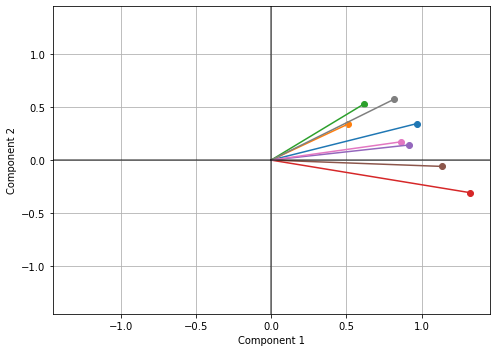

In [38]:
plt.figure(figsize=(7, 5))
biplot(tbl_loading2.values)
plt.tight_layout()
plt.show()

### Question 7

The null hypothesis is m=2 factor model estimates matrix that is not significantly different to the sample covariance matrix; the alternative hypothesis is  m=2 factor model estimates matrix that is significantly different to the sample covariance matrix;
Since P-value is 0 which is less than 0.05, We thus have solid statistical evidence to reject the null hypothesis and conclude that the m = 2 factor model estimates a covariance matrix that is significantly different to the sample covariance matrix i.e. the m = 2 FM does not fit the data well.

In [39]:
# Chi-squared test
ll_2 = np.log(np.linalg.det(x.cov())) - np.log(np.linalg.det(result2.fitted_cov))
m = 2
lr_2 = -(T - 1 - (2 * n + 5) / 6 - 2 * m / 3) * ll_2
lr_2

172.49709808441494

In [40]:
df2 = 0.5 * ((n - m) **2 - (n - m))
df2

15.0

In [41]:
stats.chi2.sf(lr_2, df2).round(4)

0.0

In [42]:
fm3 = Factor(endog=data, n_factor=3, method='ml')
result3 = fm3.fit()

In [43]:
# Chi-squared test
ll_3 = np.log(np.linalg.det(x.cov())) - np.log(np.linalg.det(result3.fitted_cov))
m = 3
lr_3 = -(T - 1 - (2 * n + 5) / 6 - 2 * m / 3) * ll_3
lr_3



22.44246589239233

In [44]:
df3 = 0.5 * ((n - m) * (n - m - 1) )
df3

10.0

In [45]:
stats.chi2.sf(lr_3, df3)

0.01300253764748235

In [46]:
ser2_3 = result3.uniqueness * data.var()

In [47]:
# overall amount of variance captured 
(np.trace(data.cov()) - np.sum(ser2_3)) / np.trace(data.cov()) *100

49.54624550669827

In [48]:
fm4 = Factor(endog=data, n_factor=4, method='ml')
result4 = fm4.fit()
result4.loadings

C:\Users\sherry\conda\lib\site-packages\statsmodels\multivariate\factor.py:419: UserWarning: Fitting did not converge
  warnings.warn("Fitting did not converge")


array([[-4.11488884e-01,  2.78689498e-01, -2.62725792e-01,
         8.35273222e-03],
       [-4.04030285e-01,  1.67807557e-01, -1.10793381e-01,
         2.35591512e-01],
       [-5.35231613e-01,  1.43609966e-01, -1.16173433e-01,
         3.21171126e-01],
       [-4.98911766e-01,  8.12691383e-01,  8.03530240e-02,
        -4.23344739e-02],
       [-3.55480437e-01,  3.67918430e-01, -2.09136692e-01,
         1.01750115e-01],
       [-5.49012627e-01,  6.69066958e-01, -2.36308071e-02,
         1.24676509e-01],
       [-3.77422418e-01,  3.62468579e-01, -5.28672472e-01,
        -1.50860507e-01],
       [-9.99989378e-01, -4.56075495e-06,  2.92496334e-07,
        -2.37711401e-07]])

In [49]:
tbl_loading4 = pd.DataFrame({'Factor 1': round(result4.loadings[:,0] * data.std(), 4),
                             'Factor 2': round(result4.loadings[:,1] * data.std(), 4),
                             'Factor 3': round(result4.loadings[:,2] * data.std(), 4),
                             'Factor 4': round(result4.loadings[:,3] * data.std(), 4)})
tbl_loading4

,Factor 1,Factor 2,Factor 3,Factor 4
SEK.AX,-0.7993,0.5413,-0.5103,0.0162
TLS.AX,-0.4897,0.2034,-0.1343,0.2856
WOW.AX,-0.6573,0.1764,-0.1427,0.3944
WBC.AX,-0.7266,1.1835,0.1170,-0.0617
BHP.AX,-0.6181,0.6398,-0.3637,0.1769
CBA.AX,-0.7091,0.8641,-0.0305,0.1610
CPU.AX,-0.6230,0.5983,-0.8727,-0.2490
WES.AX,-1.2510,-0.0000,0.0000,-0.0000


In [50]:
# Chi-squared test
ll_4 = np.log(np.linalg.det(x.cov())) - np.log(np.linalg.det(result4.fitted_cov))
m = 4
lr_4 = -(T - 1 - (2 * n + 5) / 6 - 2 * m / 3) * ll_4
lr_4



2.3648630024483195

In [51]:
df4 = 0.5 * ((n - m) * (n - m - 1) )
df4

6.0

In [52]:
stats.chi2.sf(lr_4, df4)

0.8832745041197966

In [53]:
ser3_4 = result4.uniqueness * data.var()

In [54]:
# overall amount of variance captured 
(np.trace(data.cov()) - np.sum(ser3_4)) / np.trace(data.cov()) *100

53.352222849392426

In [55]:
ser_3 = np.sqrt(ser2_3)
ser_4 = np.sqrt(ser3_4)
r2_3 = result3.communality 
r2_4 = result4.communality 
tbl_r_2 = pd.DataFrame({'s': data.std().round(4),
                        'SER (m=1)' : ser.round(4),
                        'SER (m=2)' : ser_2.round(4),
                        'SER (m=3)' : ser_3.round(4),
                        'SER (m=4)' : ser_4.round(4),
                        'r2 (m=1)': r2.round(4),
                        'r2 (m=2)': r2_2.round(4),
                        'r2 (m=3)': r2_3.round(4),
                        'r2 (m=4)': r2_4.round(4)})
tbl_r_2.T

,SEK.AX,TLS.AX,WOW.AX,WBC.AX,BHP.AX,CBA.AX,CPU.AX,WES.AX
s,1.9424,1.2121,1.2280,1.4563,1.7389,1.2915,1.6507,1.2510
SER (m=1),1.6730,1.0953,1.0612,0.7375,1.4698,0.5647,1.4002,0.9605
SER (m=2),1.6473,1.0461,0.9230,0.5318,1.4719,0.6068,1.3976,0.7550
SER (m=3),1.5933,1.0459,0.9011,0.5465,1.4522,0.5955,1.1063,0.7596
SER (m=4),1.6063,1.0432,0.9322,0.4179,1.4383,0.6258,1.0748,0.0010
r2 (m=1),0.2581,0.1834,0.2532,0.7436,0.2856,0.8088,0.2805,0.4105
r2 (m=2),0.2808,0.2551,0.4351,0.8666,0.2835,0.7793,0.2832,0.6358
r2 (m=3),0.3272,0.2554,0.4616,0.8592,0.3026,0.7874,0.5509,0.6313
r2 (m=4),0.3161,0.2592,0.4238,0.9176,0.3158,0.7652,0.5761,1.0000


### Question 8

m=4 is our choice for the number of factors. The p-value = 0.8833 which is the only p-value among all 4 that is larger than 0.05, leading to a conclusion that we cannot reject the null hypothesis; in other words, the differences in sample and estimated correlations are statistically large enough. It suggests that M=4 model is the only model so far which is appropriate for this data; it is not able to estimate the correlation matrix of the return series sufficiently accurately.

In [56]:
pvalue_1 = stats.chi2.sf(lr, df)
pvalue_2 = stats.chi2.sf(lr_2, df2)
pvalue_3 = stats.chi2.sf(lr_3, df3)
pvalue_4 = stats.chi2.sf(lr_4, df4)


In [57]:
print('P value when m=1')
pvalue_1.round(4)


P value when m=1


0.0

In [58]:
print('P value when m=2')
pvalue_2.round(4)


P value when m=2


0.0

In [59]:
print('P value when m=3')
pvalue_3.round(4)


P value when m=3


0.013

In [60]:
print('P value when m=4')
pvalue_4.round(4)


P value when m=4


0.8833

### Question 9

When using PCA analysis decomposition, restricting factors to be linear combinations of the variables in y.

$\hat{beta}= A'_{4}\sqrt{\lambda{4}}$ 

$\hat{\psi} = diag(A'\lambda{}A_{4}-A'\lambda_{4}A_{4})$

$\hat{f_{j}} = a'_{j}y$

### Question 10

In [61]:
result4.rotate(method='varimax')
result4.loadings

array([[-0.288442  ,  0.31834407, -0.34121103,  0.12295871],
       [-0.32006782,  0.24362308, -0.11264467,  0.29102225],
       [-0.44964754,  0.25573998, -0.10398669,  0.3812411 ],
       [-0.23635037,  0.91728319, -0.14203635,  0.01359296],
       [-0.20989865,  0.39694527, -0.2733331 ,  0.19871482],
       [-0.31583555,  0.77284324, -0.17057135,  0.19757214],
       [-0.21577782,  0.33066468, -0.64645344,  0.04778464],
       [-0.95065264,  0.27961034, -0.11885471,  0.06268917]])

In [62]:
tbl_loading4_ro = pd.DataFrame({'Factor 1': round(result4.loadings[:,0] * data.std() *(-1), 4),
                                'Factor 2': round(result4.loadings[:,1] * data.std(), 4),
                                'Factor 3': round(result4.loadings[:,2] * data.std(), 4),
                                'Factor 4': round(result4.loadings[:,3] * data.std(), 4)})
tbl_loading4_ro

,Factor 1,Factor 2,Factor 3,Factor 4
SEK.AX,0.5603,0.6184,-0.6628,0.2388
TLS.AX,0.3879,0.2953,-0.1365,0.3527
WOW.AX,0.5522,0.3141,-0.1277,0.4682
WBC.AX,0.3442,1.3359,-0.2069,0.0198
BHP.AX,0.3650,0.6902,-0.4753,0.3455
CBA.AX,0.4079,0.9982,-0.2203,0.2552
CPU.AX,0.3562,0.5458,-1.0671,0.0789
WES.AX,1.1893,0.3498,-0.1487,0.0784


With varimax rotation it is easier to see the rotated components and variables.

### Question 11

PCA factor model is better than task 8 model since it attempts to find a rotation of the factors so that the (squares of the) rotated factor loadings are as spaced out or far apart as possible. In this way, it is clearer to see which factors load more  on which variable. SER,R^2 and overall variance wont change after the rotation. 

# Section 2 

In [63]:
r = data
n_insample = 2000
n_all = len(r)
n_fore = n_all - n_insample

### Model 3 for asset 5 - 7

#### Model 3 for asset 5

In [64]:
# model 3 for asset 5
i_col = 4
ar21_bhp = ARIMA(r.iloc[:-n_fore, i_col], order=(2,0, 1)).fit() 
print(ar21_bhp.summary())

                               SARIMAX Results                                
Dep. Variable:                 BHP.AX   No. Observations:                 2000
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -3857.324
Date:                Fri, 23 Sep 2022   AIC                           7724.648
Time:                        20:58:37   BIC                           7752.653
Sample:                             0   HQIC                          7734.931
                               - 2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0052      0.031     -0.165      0.869      -0.066       0.056
ar.L1          0.9025      0.081     11.202      0.000       0.745       1.060
ar.L2         -0.0585      0.019     -3.056      0.0

#### Model 3 for asset 6

In [65]:
# model 3 for asset 6
i_col = 5
ar21_cba = ARIMA(r.iloc[:-n_fore, i_col], order=(2,0, 1)).fit() 

C:\Users\sherry\conda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sherry\conda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


#### Model 3 for asset 7

In [66]:
# model 3 for asset 7
i_col = 6
ar21_cpu = ARIMA(r.iloc[:-n_fore, i_col], order=(2, 0, 1)).fit()

C:\Users\sherry\conda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sherry\conda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


### Model 4 for asset 5 - 7

#### Model 4 for asset 5

In [67]:
# model 4 for asset 5
x = r.iloc[:-n_fore-1,-1].values
y5 = r.iloc[1:-n_fore, 4].values
reg_a2_5 = ARIMA(y5, exog = x, order = (1,0,0)).fit()
#print(reg_a2.summary())

In [68]:
# asset 8 as regressor
x_new = r.iloc[-n_fore-1, -1]

In [69]:
# predict asset 5 using asset 8 in model 4
reg_bhp = reg_a2_5.predict(exog = x_new, start = len(y5), end = len(y5))

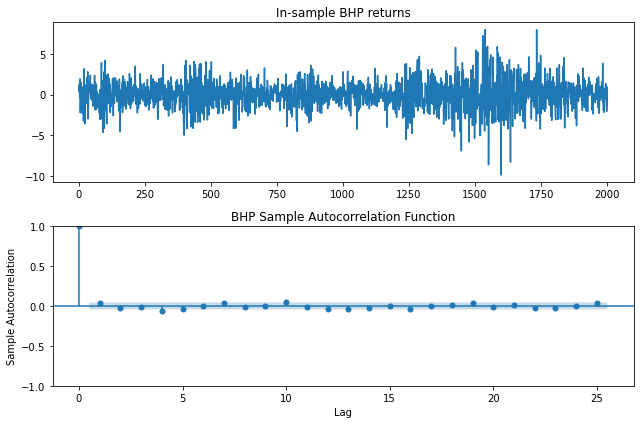

In [70]:
# figure for asset 5 reg model
fig, ax = plt.subplots(2, 1, figsize=(9, 6))
ax[0].plot(r.iloc[:-n_fore, 4])
ax[0].set_title('In-sample BHP returns')
sm.graphics.tsa.plot_acf(r.iloc[:-n_fore, 4], ax=ax[1], lags=25, alpha=0.05)
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('Sample Autocorrelation')
ax[1].set_title('BHP Sample Autocorrelation Function')
plt.tight_layout()
plt.show()

#### Model 4 for asset 6

In [71]:
# model 4 for asset 6
y6 = r.iloc[1:-n_fore, 5].values
reg_a2_6 = ARIMA(y6, exog = x, order = (1,0,0)).fit()

In [72]:
# predict asset 6 using asset 8 in model 4
reg_cba = reg_a2_6.predict(exog = x_new, start = len(y6), end = len(y6))

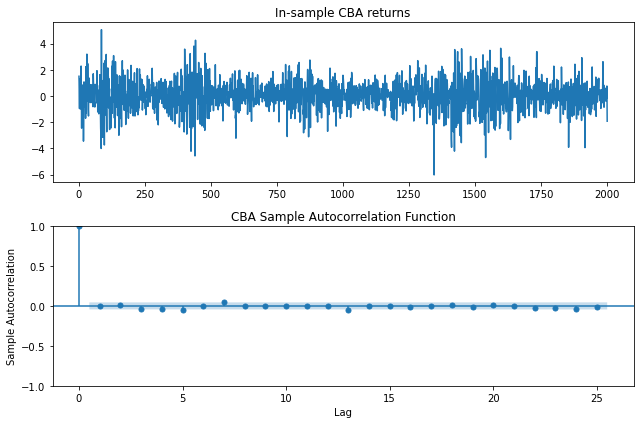

In [73]:
# figure for asset 5 reg model
fig, ax = plt.subplots(2, 1, figsize=(9, 6))
ax[0].plot(r.iloc[:-n_fore, 5])
ax[0].set_title('In-sample CBA returns')
sm.graphics.tsa.plot_acf(r.iloc[:-n_fore, 5], ax=ax[1], lags=25, alpha=0.05)
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('Sample Autocorrelation')
ax[1].set_title('CBA Sample Autocorrelation Function')
plt.tight_layout()
plt.show()

#### Model 4 for asset 7

In [74]:
# model 4 for asset 7
y7 = r.iloc[1:-n_fore, 6].values
reg_a2_7 = ARIMA(y7, exog = x, order = (1,0,0)).fit()

In [75]:
# predict asset 7 using asset 8 in model 4
reg_cpu = reg_a2_7.predict(exog = x_new, start = len(y7), end = len(y7))

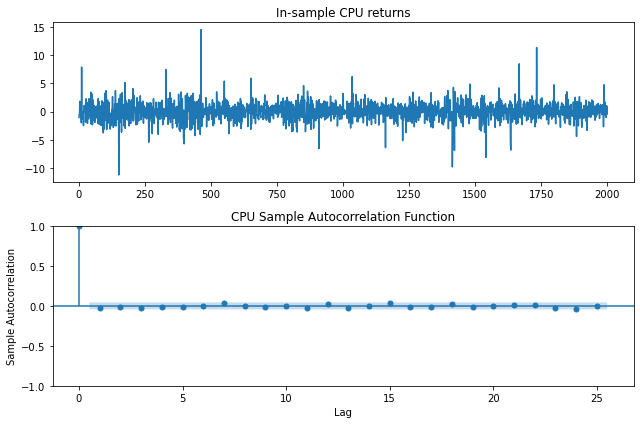

In [76]:
# figure for asset 5 reg model
fig, ax = plt.subplots(2, 1, figsize=(9, 6))
ax[0].plot(r.iloc[:-n_fore, 6])
ax[0].set_title('In-sample CPU returns')
sm.graphics.tsa.plot_acf(r.iloc[:-n_fore, 6], ax=ax[1], lags=25, alpha=0.05)
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('Sample Autocorrelation')
ax[1].set_title('CPU Sample Autocorrelation Function')
plt.tight_layout()
plt.show()

## 2.1 5th Asset forecast returns: BHP.AX

In [ ]:
fnaive_bhp = np.empty(n_fore)
f16day_bhp = np.empty(n_fore)
far21_bhp = np.empty(n_fore)
freg_bhp = np.empty(n_fore)

for i in tqdm(range(n_fore)):
    y = r.iloc[(i + 1):(-n_fore + i), 4].values
    x = r.iloc[i:(-n_fore + i - 1), -1].values
    x_new = r.iloc[(-n_fore + i - 1), -1]
    i_fore = len(y)

    # Naive
    fnaive_bhp[i] = y[-1]
    # 16 days
    f16day_bhp[i] = y[-16:].mean()
    
    # Formal models
    if i % 20 == 0:                  # re-estimate the model when i=0 and then only every 20 days after that (to save time)
        reg = ARIMA(y, exog=x, order=(1, 0, 0)).fit()   # Reg
        ar = ARIMA(y, order=(2, 0, 1)).fit()    
    
    reg_bhp = reg.apply(y, exog=x)
    arma21_bhp = ar.apply(y)
    
    # these lines generate the 1 step-ahead forecasts
    freg_bhp[i] = reg_bhp.predict(exog=x_new, start=i_fore, end=i_fore)
    far21_bhp[i] = arma21_bhp.predict(start=i_fore, end=i_fore)    


  0%|          | 0/1184 [00:00<?, ?it/s]

In [ ]:
# combination of method 2-4
fcomb_bhp = (freg_bhp + f16day_bhp + far21_bhp)/3

In [ ]:
# method 6
def loss_func(y_obs, y_hat):
    rmse = np.sqrt(np.mean((y_hat - y_obs) ** 2))
    mad = np.mean(np.abs(y_hat - y_obs))
    return (rmse, mad)

In [ ]:
fmethod6_bhp = np.vstack ([fnaive_bhp[-20:],f16day_bhp[-20:],far21_bhp[-20:],freg_bhp[-20:]]).T
fmethod6_bhp


In [ ]:
l = np.empty((2, 4))
for i in range(4):
    l[0, i], l[1, i] = loss_func(r.iloc[-20:, 4].values, fmethod6_bhp[:, i])
c_name = ['Naive', '16day', 'ARMA21', 'Reg']
tbl_bhp = pd.DataFrame(l.round(4), columns=c_name, index=['RMSE', 'MAD'])
tbl_bhp

In [ ]:
in_b1 = 1/tbl_bhp.iloc[1,0]
in_b2 = 1/tbl_bhp.iloc[1,1]
in_b3 = 1/tbl_bhp.iloc[1,2]
in_b4 = 1/tbl_bhp.iloc[1,3]

total_b = in_b1 + in_b2 + in_b3 + in_b4

b_1 = in_b1/total_b
b_2 = in_b2/total_b
b_3 = in_b3/total_b
b_4 = in_b4/total_b

In [ ]:
fmethod6_bhp = b_1 * fnaive_bhp + b_2 * f16day_bhp + b_3 * far21_bhp + b_4 * freg_bhp
fmethod6_bhp 

### Plot 

In [ ]:
# plot
plt.figure(figsize=(15, 11))
plt.plot(r.iloc[-n_fore:, 4].values, 'k-', alpha=0.2, label='BHP.AX')
plt.plot(fnaive_bhp, '*', label='Naive')
plt.plot(f16day_bhp, 'd', mfc='none', label='16day')
plt.plot(far21_bhp, 'v', mfc='none', label='ARMA(2,1)')
plt.plot(freg_bhp, 'o', mfc='none', label='Reg')
plt.plot(fcomb_bhp, 's', mfc='none', label='Combination of 2-4')
plt.plot(fmethod6_bhp, '^', mfc='none', label='Method 6')

plt.title('BHP stock returns and forecasts')
plt.legend(fontsize=10, ncol=8)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15, 11))
plt.plot(r.iloc[-n_fore:, 4].values, 'k-', alpha=0.2, label='BHP.AX')
plt.plot(fnaive_bhp, '*', label='Naive')
plt.plot(f16day_bhp, 'd', mfc='none', label='16day')
plt.plot(far21_bhp, 'v', mfc='none', label='ARMA(2,1)')
plt.plot(freg_bhp, 'o', mfc='none', label='Reg')
plt.plot(fcomb_bhp, 's', mfc='none', label='Combination of 2-4')
plt.plot(fmethod6_bhp, '^', mfc='none', label='Method 6')
plt.xlim([800, 900])

plt.title('BHP stock returns and forecasts')
plt.legend(fontsize=10, ncol=8)
plt.tight_layout()
plt.show()

From the plot, we can see that the 'naive model' is obvisouly delayed one period with the true return, result it being the least effective model in forecast the true return of BHP. The other model seems more stable and mainly stays in the middle of the true return. Within these models, the '16day average model' has the most flutuation, as this model can observe some high and lows in the pattern flow during peak and downfall in the true return of BHP. The 'Method6 model' also seem to have a bit more flutuation than the rest of model. While the 'ARMA(2,1) model', the 'Reg AR(1) model' and the 'combination of 2-4 model' mainly overlaps with each other, showing a similar trend when forecasting the true return of BHP. From the observation of the plot, we suggest that the '16day average model' would the most sutiable model in forecasting the true return of BHP, as it demonstrates the flutuation trend of the true return without a significant lag. 

## 2.2 RMSE, MAD and MZ regression for asset 5

In [ ]:
def loss_func(y_obs, y_hat):
    rmse = np.sqrt(np.mean((y_hat - y_obs) ** 2))
    mad = np.mean(np.abs(y_hat - y_obs))
    return (rmse, mad)

In [ ]:
# BHP
f_all = np.vstack([fnaive_bhp, f16day_bhp, far21_bhp, freg_bhp, fcomb_bhp, fmethod6_bhp]).T
i_col = 4
r_fore = r.iloc[-n_fore:, i_col].values # the true value of BHP
l = np.empty((2, 6)) # 2 loss functions and 6 methods
for i in range(6):
    l[0, i], l[1, i] = loss_func(r_fore, f_all[:, i]) # f_all is the forecast for BHP
c_name = ['naive', '16 day average', 'arma(2,1)','ar(1)','combination of method 2-4','method 6']
tbl_bhp = pd.DataFrame(l.round(4), columns=c_name, index=['RMSE', 'MAD'])
tbl_bhp

,naive,16 day average,"arma(2,1)",ar(1),combination of method 2-4,method 6
RMSE,2.6821,1.9049,1.8597,1.8476,1.8557,1.9073
MAD,1.9480,1.3971,1.3397,1.3379,1.3475,1.4026


In [ ]:
dff_bhp = pd.DataFrame({
    'r_fore': r_fore,
    'f_bhp_naive': f_all[:, 0],
    'f_bhp_16day': f_all[:, 1],
    'f_bhp_arma': f_all[:, 2],
    'f_bhp_ar1': f_all[:, 3],
    'f_bhp_comb': f_all[:, 4],
    'f_bhp_method6': f_all[:,5]})
dff_bhp

,r_fore,f_bhp_naive,f_bhp_16day,f_bhp_arma,f_bhp_ar1,f_bhp_comb,f_bhp_method6
0,1.020440,-1.237746,-0.266665,-0.048784,-0.058945,-0.124798,-0.321980
1,1.547069,1.020440,-0.233526,0.060715,0.034452,-0.046120,0.143623
2,-0.932579,1.547069,-0.013374,0.040406,0.051594,0.026209,0.296152
3,-2.001892,-0.932579,-0.118244,-0.085031,-0.033831,-0.079035,-0.230582
4,-0.220847,-2.001892,-0.170002,-0.082498,-0.082199,-0.111566,-0.446908
...,...,...,...,...,...,...,...
1179,-1.338835,1.079976,-0.019153,-0.021506,0.034735,-0.001975,0.189895
1180,0.077719,-1.338835,0.094675,-0.016529,-0.207648,-0.043167,-0.272801
1181,-1.146148,0.077719,0.188985,0.021303,0.173884,0.128057,0.118532
1182,1.662817,-1.146148,0.208103,0.027340,0.017002,0.084148,-0.134408


In [ ]:
import statsmodels.formula.api as smf

mz_bhp_naive = smf.ols('r_fore ~ f_bhp_naive', dff_bhp).fit()
mz_bhp_16day = smf.ols('r_fore ~ f_bhp_16day', dff_bhp).fit()
mz_bhp_arma = smf.ols('r_fore ~ f_bhp_arma', dff_bhp).fit()
mz_bhp_ar1 = smf.ols('r_fore ~ f_bhp_ar1', dff_bhp).fit()
mz_bhp_comb = smf.ols('r_fore ~ f_bhp_comb', dff_bhp).fit()
mz_bhp_method6 = smf.ols('r_fore ~ f_bhp_method6', dff_bhp).fit()


# bhp F test for alpha=0, beta=1 from MZ regression

wald_naive = mz_bhp_naive.wald_test('(Intercept = 0, f_bhp_naive = 1)')
wald_16day = mz_bhp_16day.wald_test('(Intercept = 0, f_bhp_16day = 1)')
wald_arma = mz_bhp_arma.wald_test('(Intercept = 0, f_bhp_arma = 1)')
wald_ar1 = mz_bhp_ar1.wald_test('(Intercept = 0, f_bhp_ar1 = 1)')
wald_comb = mz_bhp_comb.wald_test('(Intercept = 0, f_bhp_comb = 1)')
wald_method6 = mz_bhp_method6.wald_test('(Intercept = 0, f_bhp_method6 = 1)')

# bhp MZ R^2
mz_bhp_r2 = pd.Series([
    mz_bhp_naive.rsquared,
    mz_bhp_16day.rsquared,
    mz_bhp_arma.rsquared,
    mz_bhp_ar1.rsquared,
    mz_bhp_comb.rsquared,
    mz_bhp_method6.rsquared], index=dff_bhp.columns[1:])


# MZ F-stat
mz_f = pd.Series([
    wald_naive.fvalue[0][0],
    wald_16day.fvalue[0][0],
    wald_arma.fvalue[0][0],
    wald_ar1.fvalue[0][0],
    wald_comb.fvalue[0][0],
    wald_method6.fvalue[0][0]],index=dff_bhp.columns[1:])
#mz_f

# MZ p-value
mz_p = pd.Series([
    wald_naive.pvalue,
    wald_16day.pvalue,
    wald_arma.pvalue,
    wald_ar1.pvalue,
    wald_comb.pvalue,
    wald_method6.pvalue], index=dff_bhp.columns[1:])
#mz_p

# ibm MZ parameters
mz_bhp_par = pd.DataFrame([
    mz_bhp_naive.params.values,
    mz_bhp_16day.params.values,
    mz_bhp_arma.params.values,
    mz_bhp_ar1.params.values,
    mz_bhp_comb.params.values,
    mz_bhp_method6.params.values], index=dff_bhp.columns[1:], columns=['alpha', 'beta'])
mz_bhp_par

/Users/iyw/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1889: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


,alpha,beta
f_bhp_naive,0.060986,-0.050859
f_bhp_16day,0.058166,-0.000897
f_bhp_arma,0.080788,-1.307330
f_bhp_ar1,0.040465,0.755594
f_bhp_comb,0.057069,0.033335
f_bhp_method6,0.065181,-0.197176


In [ ]:
i_col = 4
l = np.empty((5, 6))
for i in range(6):
    l[0, i], l[1, i] = loss_func(r_fore, f_all[:, i])
    l[2, i] = mz_bhp_r2[i]
    l[3, i] = mz_f[i]
    l[4, i] = mz_p[i]
c_name = ['Naive', '16day', 'ARMA(2,1)', 'Reg', 'Combination of 2-4','Method6']
tbl_bhp = pd.DataFrame(l.round(4), columns=c_name, index=['RMSE', 'MAD', 'MZ R-sq', 'MZ F', 'MZ pval'])
tbl_bhp

,Naive,16day,"ARMA(2,1)",Reg,Combination of 2-4,Method6
RMSE,2.6821,1.9049,1.8597,1.8476,1.8557,1.9073
MAD,1.9480,1.3971,1.3397,1.3379,1.3475,1.4026
MZ R-sq,0.0026,0.0000,0.0047,0.0033,0.0000,0.0017
MZ F,654.5201,35.6377,9.0728,0.4124,3.6943,38.2763
MZ pval,0.0000,0.0000,0.0001,0.6621,0.0252,0.0000


From the RMSE and MAD, it suggests that the 'Reg AR(1) model' is the best model to predict the true return of BHP as it had the smallest RMSE and MAD, the 'ARMA(2,1) model' and the 'combination of 2-4 model' seems to also have a good prediction capability to forecast the true return. While 'naive model' seem like the worst model to forecast the return. 

The r-squared tells you the amount of movement explained by the forecast, it seems like all models does not explains the forecast well as r-sqaured are really small, all models that could only explain less than 1% of the forecast return.

The p value is to see how close the model is to alpha being 0, and beta being 1 (p< 0.05). From the value, we can see that only 'Regression AR(1) model' accept the hypothesis, showing that this model's alpha is close to 0 and beta is close to 1. 

From the above quantitiative measures, we can see that the 'Regression AR(1) model' seems to be the best model in forecasting the true return of BHP. As it has the smallest RMSE and MAD, also its p value accept the null hypothesis. Additionally, it can explain the most movement from forecast as it has the largest the r-square in all models. 

## 2.3 RMSE, MAD and MZ regression for asset 6

In [ ]:
fnaive_cba = np.empty(n_fore)
f16day_cba = np.empty(n_fore)
far21_cba = np.empty(n_fore)
freg_cba = np.empty(n_fore)

for i in tqdm(range(n_fore)):
    y = r.iloc[(i + 1):(-n_fore + i), 5].values
    x = r.iloc[i:(-n_fore + i - 1), -1].values
    x_new = r.iloc[(-n_fore + i - 1), -1]
    i_fore = len(y)

    # Naive
    fnaive_cba[i] = y[-1]
    # 16 days
    f16day_cba[i] = y[-16:].mean()
   
    # Formal models
    if i % 20 == 0:                  # re-estimate the model when i=0 and then only every 20 days after that (to save time)
        reg_c = ARIMA(y, exog=x, order=(1, 0, 0)).fit()   # Reg
        ar_c = ARIMA(y, order=(2, 0, 1)).fit()    
    
    reg_cba = reg_c.apply(y, exog=x)
    arma21_cba = ar_c.apply(y)
    
    # these lines generate the 1 step-ahead forecasts
    freg_cba[i] = reg_cba.predict(exog=x_new, start=i_fore, end=i_fore)
    far21_cba[i] = arma21_cba.predict(start=i_fore, end=i_fore)    

  0%|          | 0/1184 [00:00<?, ?it/s]

In [ ]:
# combination of method 2-4
fcomb_cba = (freg_cba + f16day_cba + far21_cba)/3

In [ ]:
# method 6
fmethod6_cba = np.vstack ([fnaive_cba[-20:],f16day_cba[-20:],far21_cba[-20:],freg_cba[-20:]]).T
fmethod6_cba

array([[-4.31990661e-02,  3.67855638e-01,  3.10909059e-02,
         5.67417197e-02],
       [ 1.16017367e+00,  4.19629751e-01, -5.97622556e-02,
        -6.27734751e-02],
       [ 1.06236978e+00,  3.36489229e-01, -5.25597250e-02,
        -7.49302181e-02],
       [-1.50122327e+00,  2.49636714e-01,  1.40865955e-01,
         9.59005306e-02],
       [ 5.36142039e-02,  2.40439999e-01,  2.39280109e-02,
        -7.85863626e-03],
       [ 1.03462639e+00,  2.76617758e-01, -5.02986318e-02,
        -4.88459093e-02],
       [ 7.50572092e-01,  8.01592874e-02, -2.90173317e-02,
        -1.17766891e-02],
       [ 1.12060471e+00,  1.63545657e-01, -5.69001114e-02,
        -8.74915903e-02],
       [ 1.65259235e+00,  3.03018095e-01, -9.70898112e-02,
        -1.27558564e-01],
       [ 1.84221547e-01,  4.93135088e-01,  1.36169326e-02,
         1.93592769e-02],
       [-7.49227809e-01,  4.24219132e-01,  8.42535757e-02,
         1.17381276e-01],
       [-3.50868765e-01,  3.50820608e-01,  5.43412574e-02,
      

In [ ]:
l = np.empty((2, 4))
for i in range(4):
    l[0, i], l[1, i] = loss_func(r.iloc[-20:, 5].values, fmethod6_cba[:, i])
c_name = ['Naive', '16day', 'ARMA21', 'Reg']
tbl_cba = pd.DataFrame(l.round(4), columns=c_name, index=['RMSE', 'MAD'])
tbl_cba

,Naive,16day,ARMA21,Reg
RMSE,1.4583,1.0251,1.0934,1.0866
MAD,1.1921,0.8542,0.9715,0.9695


In [ ]:
in_c1 = 1/tbl_cba.iloc[1,0]
in_c2 = 1/tbl_cba.iloc[1,1]
in_c3 = 1/tbl_cba.iloc[1,2]
in_c4 = 1/tbl_cba.iloc[1,3]

total_c = in_c1 + in_c2 + in_c3 + in_c4

c_1 = in_c1/total_c
c_2 = in_c2/total_c
c_3 = in_c3/total_c
c_4 = in_c4/total_c

In [ ]:
fmethod6_cba = c_1 * fnaive_cba + c_2 * f16day_cba + c_3 * far21_cba + c_4 * freg_cba
fmethod6_cba

array([-0.38387645, -0.09956797, -0.08208205, ..., -0.10491332,
        0.37772125,  0.0872424 ])

In [ ]:
# CBA
f_all_c = np.vstack([fnaive_cba, f16day_cba, far21_cba, freg_cba, fcomb_cba, fmethod6_cba]).T
i_col = 5
r_fore_c = r.iloc[-n_fore:, i_col].values 
l = np.empty((2, 6)) # 2 loss functions and 6 methods
for i in range(6):
    l[0, i], l[1, i] = loss_func(r_fore_c, f_all_c[:, i]) 
c_name = ['naive', '16 day average', 'arma(2,1)','ar(1)','combination of method 2-4','method 6']
tbl_cba = pd.DataFrame(l.round(4), columns=c_name, index=['RMSE', 'MAD'])
tbl_cba

,naive,16 day average,"arma(2,1)",ar(1),combination of method 2-4,method 6
RMSE,2.3072,1.5975,1.5580,1.5538,1.5581,1.6213
MAD,1.4520,1.0575,1.0245,1.0236,1.0295,1.0498


In [ ]:
dff_cba = pd.DataFrame({
    'r_fore': r_fore_c,
    'f_cba_naive': f_all_c[:, 0],
    'f_cba_16day': f_all_c[:, 1],
    'f_cba_arma': f_all_c[:, 2],
    'f_cba_ar1': f_all_c[:, 3],
    'f_cba_comb': f_all_c[:, 4],
    'f_cba_method6': f_all_c[:,5]})
dff_cba

,r_fore,f_cba_naive,f_cba_16day,f_cba_arma,f_cba_ar1,f_cba_comb,f_cba_method6
0,-0.327867,-1.932617,-0.065748,0.049046,0.082569,0.021955,-0.383876
1,-0.316300,-0.327867,-0.138193,-0.011363,0.041917,-0.035880,-0.099568
2,-0.228317,-0.316300,-0.151007,0.059076,0.045761,-0.015390,-0.082082
3,-0.177960,-0.228317,-0.216856,0.020538,0.031187,-0.055044,-0.096328
4,0.469642,-0.177960,-0.174080,0.044188,0.048108,-0.027262,-0.063378
...,...,...,...,...,...,...,...
1179,0.876640,0.307164,0.548320,0.004454,0.000711,0.184495,0.222315
1180,-1.481950,0.876640,0.605810,-0.033012,-0.079348,0.164483,0.326450
1181,1.315096,-1.481950,0.440677,0.140837,0.150513,0.244009,-0.104913
1182,-0.383839,1.315096,0.456472,-0.064505,-0.032683,0.119761,0.377721


In [ ]:
import statsmodels.formula.api as smf

mz_cba_naive = smf.ols('r_fore ~ f_cba_naive', dff_cba).fit()
mz_cba_16day = smf.ols('r_fore ~ f_cba_16day', dff_cba).fit()
mz_cba_arma = smf.ols('r_fore ~ f_cba_arma', dff_cba).fit()
mz_cba_ar1 = smf.ols('r_fore ~ f_cba_ar1', dff_cba).fit()
mz_cba_comb = smf.ols('r_fore ~ f_cba_comb', dff_cba).fit()
mz_cba_method6 = smf.ols('r_fore ~ f_cba_method6', dff_cba).fit()


# cba F test for alpha=0, beta=1 from MZ regression

wald_naive_c = mz_cba_naive.wald_test('(Intercept = 0, f_cba_naive = 1)')
wald_16day_c = mz_cba_16day.wald_test('(Intercept = 0, f_cba_16day = 1)')
wald_arma_c = mz_cba_arma.wald_test('(Intercept = 0, f_cba_arma = 1)')
wald_ar1_c = mz_cba_ar1.wald_test('(Intercept = 0, f_cba_ar1 = 1)')
wald_comb_c = mz_cba_comb.wald_test('(Intercept = 0, f_cba_comb = 1)')
wald_method6_c = mz_cba_method6.wald_test('(Intercept = 0, f_cba_method6 = 1)')

# cba MZ R^2
mz_cba_r2 = pd.Series([
    mz_cba_naive.rsquared,
    mz_cba_16day.rsquared,
    mz_cba_arma.rsquared,
    mz_cba_ar1.rsquared,
    mz_cba_comb.rsquared,
    mz_cba_method6.rsquared], index=dff_cba.columns[1:])


# MZ F-stat
mz_f_c = pd.Series([
    wald_naive_c.fvalue[0][0],
    wald_16day_c.fvalue[0][0],
    wald_arma_c.fvalue[0][0],
    wald_ar1_c.fvalue[0][0],
    wald_comb_c.fvalue[0][0],
    wald_method6_c.fvalue[0][0]],index=dff_cba.columns[1:])
#mz_f

# MZ p-value
mz_p_c = pd.Series([
    wald_naive_c.pvalue,
    wald_16day_c.pvalue,
    wald_arma_c.pvalue,
    wald_ar1_c.pvalue,
    wald_comb_c.pvalue,
    wald_method6_c.pvalue], index=dff_cba.columns[1:])
#mz_p

# ibm MZ parameters
mz_cba_par = pd.DataFrame([
    mz_cba_naive.params.values,
    mz_cba_16day.params.values,
    mz_cba_arma.params.values,
    mz_cba_ar1.params.values,
    mz_cba_comb.params.values,
    mz_cba_method6.params.values], index=dff_cba.columns[1:], columns=['alpha', 'beta'])
mz_cba_par

/Users/iyw/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1889: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


,alpha,beta
f_cba_naive,0.042992,-0.109141
f_cba_16day,0.040261,-0.036481
f_cba_arma,0.056302,-0.512698
f_cba_ar1,0.047444,-0.234406
f_cba_comb,0.048008,-0.260093
f_cba_method6,0.056745,-0.507606


In [ ]:
i_col = 5
l = np.empty((5, 6))
for i in range(6):
    l[0, i], l[1, i] = loss_func(r_fore_c, f_all_c[:, i])
    l[2, i] = mz_cba_r2[i]
    l[3, i] = mz_f_c[i]
    l[4, i] = mz_p_c[i]
c_name = ['Naive', '16day', 'ARMA(2,1)', 'Reg', 'Combination of 2-4','Method6']
tbl_cba = pd.DataFrame(l.round(4), columns=c_name, index=['RMSE', 'MAD', 'MZ R-sq', 'MZ F', 'MZ pval'])
tbl_cba

,Naive,16day,"ARMA(2,1)",Reg,Combination of 2-4,Method6
RMSE,2.3072,1.5975,1.5580,1.5538,1.5581,1.6213
MAD,1.4520,1.0575,1.0245,1.0236,1.0295,1.0498
MZ R-sq,0.0119,0.0001,0.0016,0.0002,0.0005,0.0123
MZ F,736.4942,37.8561,8.0714,4.0377,7.5585,64.7782
MZ pval,0.0000,0.0000,0.0003,0.0179,0.0005,0.0000


From the RMSE and MAD, it suggests that the 'Reg AR(1) model' is the best model to predict the true return of CBA, the 'ARMA(2,1) model' and the 'combination of 2-4 model' seems to also have a good prediction capability to predict the true return. While 'naive model' seem like the worst model in forecast the return, which is understandable as the 'naive model' always predict the forecast one day behind the true return. 

From the r-sqaured, it seems like no model explains the forecast well, the 'naive model' and the 'method6 model' are relatively strong in explain the forecast, however it is still quite small.

There is no model that accpet the hypothesis of alpha close to 0, and beta close to 1 (p < 0.05); suggest that we should find a better modelto forecast the true return of CBA. 

From these quantitative measures, it looks like the 'Reg AR(!)' is the best model in forecast the true return of CBA. As it has the smallest RMSE and MAD, also if we set the significance to 0.01, then we can accpt the null hypothesis for the 'Reg AR(1) model'. Therefore, it suggests that 'Reg AR(1) model' is the best model to forecast the return of CBA.

## 2.4 RMSE, MAD and MZ regression for asset 7

In [ ]:
fnaive_cpu = np.empty(n_fore)
f16day_cpu = np.empty(n_fore)
far21_cpu = np.empty(n_fore)
freg_cpu = np.empty(n_fore)

for i in tqdm(range(n_fore)):
    y = r.iloc[(i + 1):(-n_fore + i), 6].values
    x = r.iloc[i:(-n_fore + i - 1), -1].values
    x_new = r.iloc[(-n_fore + i - 1), -1]
    i_fore = len(y)

    # Naive
    fnaive_cpu[i] = y[-1]
    # 16 days
    f16day_cpu[i] = y[-16:].mean()
    
    
    
    
    # Formal models
    if i % 20 == 0:                  # re-estimate the model when i=0 and then only every 20 days after that (to save time)
        reg_cpu = ARIMA(y, exog=x, order=(1, 0, 0)).fit()   # Reg
        ar_cpu = ARIMA(y, order=(2, 0, 1)).fit()    
    
    reg_cpu = reg_cpu.apply(y, exog=x)
    arma21_cpu = ar_cpu.apply(y)
    
    # these lines generate the 1 step-ahead forecasts
    freg_cpu[i] = reg_cpu.predict(exog=x_new, start=i_fore, end=i_fore)
    far21_cpu[i] = arma21_cpu.predict(start=i_fore, end=i_fore)    

  0%|          | 0/1184 [00:00<?, ?it/s]

/Users/iyw/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/iyw/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
# combination of method 2-4
fcomb_cpu = (freg_cpu + f16day_cpu + far21_cpu)/3

In [ ]:
# method 6
fmethod6_cpu = np.vstack ([fnaive_cpu[-20:],f16day_cpu[-20:],far21_cpu[-20:],freg_cpu[-20:]]).T
fmethod6_cpu


array([[-0.94708895,  0.17569882,  0.04535484,  0.07354044],
       [ 1.60068481,  0.28905357, -0.0361717 ,  0.01669574],
       [-0.44888097,  0.13697071,  0.07043916,  0.03610479],
       [ 2.66359633,  0.49446167, -0.01214787,  0.00780912],
       [ 0.55599142,  0.54539649,  0.12366107,  0.02739548],
       [ 1.68863759,  0.51468356,  0.101359  ,  0.01984412],
       [-1.17510886,  0.29497294,  0.19928832,  0.06610723],
       [ 1.52496557,  0.32863013,  0.07647396,  0.00576904],
       [ 1.15741249,  0.34245006,  0.12398834,  0.00711468],
       [ 0.11501675,  0.35977671,  0.1641344 ,  0.04983811],
       [-2.36491907,  0.15892761,  0.19291783,  0.10121373],
       [ 1.17006732,  0.21447615,  0.01772381,  0.06878891],
       [ 0.07751736,  0.2067935 ,  0.08078307,  0.03459956],
       [-3.54926726,  0.03018084,  0.14842749,  0.09737581],
       [ 0.2806141 ,  0.17764065, -0.06036061,  0.0344642 ],
       [ 1.27288668,  0.22638283, -0.05110181,  0.02885141],
       [ 0.31570606,  0.

In [ ]:
l = np.empty((2, 4))
for i in range(4):
    l[0, i], l[1, i] = loss_func(r.iloc[-20:, 6].values, fmethod6_cpu[:, i])
c_name = ['Naive', '16day', 'ARMA21', 'Reg']
tbl_cpu = pd.DataFrame(l.round(4), columns=c_name, index=['RMSE', 'MAD'])
tbl_cpu

,Naive,16day,ARMA21,Reg
RMSE,2.2271,1.4925,1.4877,1.4794
MAD,1.9080,1.1533,1.1905,1.1900


In [ ]:
in_cpu1 = 1/tbl_cpu.iloc[1,0]
in_cpu2 = 1/tbl_cpu.iloc[1,1]
in_cpu3 = 1/tbl_cpu.iloc[1,2]
in_cpu4 = 1/tbl_cpu.iloc[1,3]

total_cpu = in_cpu1 + in_cpu2 + in_cpu3 + in_cpu4

cpu_1 = in_cpu1/total_cpu
cpu_2 = in_cpu2/total_cpu
cpu_3 = in_cpu3/total_cpu
cpu_4 = in_cpu4/total_cpu

In [ ]:
fmethod6_cpu = cpu_1 * fnaive_cpu + cpu_2 * f16day_cpu + cpu_3 * far21_cpu + cpu_4 * freg_cpu
fmethod6_cpu

array([ 0.04685184, -0.11570585,  0.1561218 , ...,  0.23641102,
        0.28791893, -0.1894471 ])

In [ ]:
# CPU
f_all_cpu = np.vstack([fnaive_cpu, f16day_cpu, far21_cpu, freg_cpu, fcomb_cpu, fmethod6_cpu]).T
i_col = 6
r_fore_cpu = r.iloc[-n_fore:, i_col].values 
l = np.empty((2, 6)) # 2 loss functions and 6 methods
for i in range(6):
    l[0, i], l[1, i] = loss_func(r_fore_cpu, f_all_cpu[:, i]) 
c_name = ['naive', '16 day average', 'arma(2,1)','ar(1)','combination of method 2-4','method 6']
tbl_cpu = pd.DataFrame(l.round(4), columns=c_name, index=['RMSE', 'MAD'])
tbl_cpu

,naive,16 day average,"arma(2,1)",ar(1),combination of method 2-4,method 6
RMSE,2.6300,1.8618,1.8315,1.8115,1.8181,1.8611
MAD,1.7794,1.2792,1.2267,1.2222,1.2330,1.2629


In [ ]:
dff_cpu = pd.DataFrame({
    'r_fore': r_fore_cpu,
    'f_cpu_naive': f_all_cpu[:, 0],
    'f_cpu_16day': f_all_cpu[:, 1],
    'f_cpu_arma': f_all_cpu[:, 2],
    'f_cpu_ar1': f_all_cpu[:, 3],
    'f_cpu_comb': f_all_cpu[:, 4],
    'f_cpu_method6': f_all_cpu[:,5]})
dff_cpu

,r_fore,f_cpu_naive,f_cpu_16day,f_cpu_arma,f_cpu_ar1,f_cpu_comb,f_cpu_method6
0,-1.344764,-0.424126,0.347203,0.010574,0.066950,0.141576,0.046852
1,0.061518,-1.344764,0.259145,0.064940,0.083496,0.135860,-0.115706
2,-0.061518,0.061518,0.429558,0.059308,0.029760,0.172876,0.156122
3,-0.927359,-0.061518,0.421598,0.053864,0.020420,0.165294,0.128836
4,1.540853,-0.927359,0.066345,0.080019,0.074356,0.073573,-0.097285
...,...,...,...,...,...,...,...
1179,0.315706,1.272887,0.226383,-0.051102,0.028851,0.068044,0.275026
1180,0.824024,0.315706,0.305308,0.024597,0.010824,0.113576,0.149746
1181,0.972204,0.824024,0.256766,0.026655,0.058588,0.114003,0.236411
1182,-1.520795,0.972204,0.345584,0.051156,0.038301,0.145014,0.287919


In [ ]:
import statsmodels.formula.api as smf

mz_cpu_naive = smf.ols('r_fore ~ f_cpu_naive', dff_cpu).fit()
mz_cpu_16day = smf.ols('r_fore ~ f_cpu_16day', dff_cpu).fit()
mz_cpu_arma = smf.ols('r_fore ~ f_cpu_arma', dff_cpu).fit()
mz_cpu_ar1 = smf.ols('r_fore ~ f_cpu_ar1', dff_cpu).fit()
mz_cpu_comb = smf.ols('r_fore ~ f_cpu_comb', dff_cpu).fit()
mz_cpu_method6 = smf.ols('r_fore ~ f_cpu_method6', dff_cpu).fit()


# cba F test for alpha=0, beta=1 from MZ regression

wald_naive_cpu = mz_cpu_naive.wald_test('(Intercept = 0, f_cpu_naive = 1)')
wald_16day_cpu = mz_cpu_16day.wald_test('(Intercept = 0, f_cpu_16day = 1)')
wald_arma_cpu = mz_cpu_arma.wald_test('(Intercept = 0, f_cpu_arma = 1)')
wald_ar1_cpu = mz_cpu_ar1.wald_test('(Intercept = 0, f_cpu_ar1 = 1)')
wald_comb_cpu = mz_cpu_comb.wald_test('(Intercept = 0, f_cpu_comb = 1)')
wald_method6_cpu = mz_cpu_method6.wald_test('(Intercept = 0, f_cpu_method6 = 1)')

# cba MZ R^2
mz_cpu_r2 = pd.Series([
    mz_cpu_naive.rsquared,
    mz_cpu_16day.rsquared,
    mz_cpu_arma.rsquared,
    mz_cpu_ar1.rsquared,
    mz_cpu_comb.rsquared,
    mz_cpu_method6.rsquared], index=dff_cpu.columns[1:])


# MZ F-stat
mz_f_cpu = pd.Series([
    wald_naive_cpu.fvalue[0][0],
    wald_16day_cpu.fvalue[0][0],
    wald_arma_cpu.fvalue[0][0],
    wald_ar1_cpu.fvalue[0][0],
    wald_comb_cpu.fvalue[0][0],
    wald_method6_cpu.fvalue[0][0]],index=dff_cpu.columns[1:])
#mz_f

# MZ p-value
mz_p_cpu = pd.Series([
    wald_naive_cpu.pvalue,
    wald_16day_cpu.pvalue,
    wald_arma_cpu.pvalue,
    wald_ar1_cpu.pvalue,
    wald_comb_cpu.pvalue,
    wald_method6_cpu.pvalue], index=dff_cpu.columns[1:])
#mz_p

# ibm MZ parameters
mz_cpu_par = pd.DataFrame([
    mz_cpu_naive.params.values,
    mz_cpu_16day.params.values,
    mz_cpu_arma.params.values,
    mz_cpu_ar1.params.values,
    mz_cpu_comb.params.values,
    mz_cpu_method6.params.values], index=dff_cpu.columns[1:], columns=['alpha', 'beta'])
mz_cpu_par

/Users/iyw/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1889: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


,alpha,beta
f_cpu_naive,0.048631,-0.056162
f_cpu_16day,0.038572,0.151148
f_cpu_arma,0.127214,-1.657100
f_cpu_ar1,0.076590,-0.828117
f_cpu_comb,0.042401,0.080330
f_cpu_method6,0.055864,-0.217093


In [ ]:
i_col = 6
l = np.empty((5, 6))
for i in range(6):
    l[0, i], l[1, i] = loss_func(r_fore_cpu, f_all_cpu[:, i])
    l[2, i] = mz_cpu_r2[i]
    l[3, i] = mz_f_cpu[i]
    l[4, i] = mz_p_cpu[i]
c_name = ['Naive', '16day', 'ARMA(2,1)', 'Reg', 'Combination of 2-4','Method6']
tbl_cpu = pd.DataFrame(l.round(4), columns=c_name, index=['RMSE', 'MAD', 'MZ R-sq', 'MZ F', 'MZ pval'])
tbl_cpu

,Naive,16day,"ARMA(2,1)",Reg,Combination of 2-4,Method6
RMSE,2.6300,1.8618,1.8315,1.8115,1.8181,1.8611
MAD,1.7794,1.2792,1.2267,1.2222,1.2330,1.2629
MZ R-sq,0.0032,0.0019,0.0155,0.0005,0.0001,0.0019
MZ F,661.2022,35.7362,23.9138,1.5035,5.5718,35.2928
MZ pval,0.0000,0.0000,0.0000,0.2228,0.0039,0.0000


From RMSE and MAD, it looks liks the 'Reg AR(1)' has the best prediciton of the true return of CPU. While the 'naive model' has the worst forecast of the true return. 

The r-squared demonstrates that the 'ARMA(2,1) model' seems can explain the most movement from the forecast compare with other models, however it is still quite small (r^2 = 1.55%).

Additionally, the p value of the MZ regression shows that only the 'Reg AR(1) model' accepts the null hypothesis, while other rejected. 

From the above quantitive mesure, it demonstrates that 'Reg AR(1) model' should be the best one to forecast the return of CPU, as it has the smallest RMSE and MAD, also it is the only model that accpets the null hypothesis of alpha close to 0 and beta close to 1. 


# Section 3



### Question 1

$\begin{aligned} & L c\left(\varphi, \tau^2 \mid y\right)=p\left(y_1, y_2, \cdots y_T \mid \varphi, \tau^2\right)=\prod_{t=1}^T p\left(y t \mid y_{t-1}, \cdots, y_1, y_0, y_{-1}, \varphi, \tau^2\right) \\=& \prod_{t=1}^T \frac{1}{\sqrt{2 \pi \tau^2}} \exp \left\{\frac{1}{-2 \tau^2}\left(y_t-\varphi_1 y_{t-1}-\varphi_2 y_{t-2}\right)^2\right\} \end{aligned}$

### Question 2

$-\log L_c\left(\varphi, \tau^2 \mid y\right)$

$=-\log {\prod_{t=1}}^T \frac{1}{\sqrt{2 \lambda} \tau} \exp \left\{-\frac{1}{2 \tau^2}\left(y_t-\varphi_1 y_{t-1}-\varphi_2 y_{t-2}\right)^2\right\}$

$=\frac{1}{2 \tau^2} \sum_{t=1}^T\left(y_t-\varphi_1y_{-1}-\varphi_2 y_{t-2}\right)^2+\frac{1}{2} T \log 2 \pi \tau^2$

### Question 3

$\frac{\partial\left[-\log L_c\left(\varphi, \tau^2 \mid y\right)\right]}{\partial \varphi_1}$

$=\frac{1}{2 \tau^2} \sum_{t=1}^T 2\left(y_t-\varphi_1 y_{t-1}-\varphi_{2} y_{t-2}\right) \cdot-y_{t-1}=0$.

$\frac{\partial\left[-\log L_c\left(\varphi, \tau^2 \mid y\right)\right]}{\partial \varphi_2 }$

$=\frac{1}{2 \tau^2} \sum_{t=1}^T 2\left(y_t-\varphi_1 y_{t-1}-\varphi_2 y_{t-2}\right) \cdot-y_{t-2}=0$

The equations are in the following:

 $\Rightarrow\left\{\varphi_1 \sum_{t=1}^T y_{t-1}^2+\varphi_2 \sum_{t=1}^T y_{t-1} y_{t-2}=\sum_{t=1}^T y_t y_{t-1}\right.$

$\varphi_1 \sum_{t=1}^T y_{t-1} y_{t-2}+\varphi_2 \sum_{t=1}^T y_{t-2}^2=\sum_{t=1}^{T} y_t y_{t-2}$

### Question 4

The formulas for the mles of this model are in the following:

$\psi_1$ = 
$\frac{\sum_{t=1}^T y_{t-2}^2 \times \sum_{t=1}^T y_{t} y_{t-1} - \sum_{t=1}^T y_{t-1} y_{t-2} \sum_{t=1}^T y_{t} y_{t-2}}{\sum_{t=1}^T y_{t-1}^2 \times \sum_{t=1}^T y_{t-2}^2 - (\sum_{t=1}^T y_{t-1}y_{t-2})^2}$

$\psi_2$ = 
$\frac{\sum_{t=1}^T y_{t-1}^2 \times \sum_{t=1}^T y_{t} y_{t-2} - \sum_{t=1}^T y_{t} y_{t-1} \sum_{t=1}^T y_{t-1} y_{t-2}}{\sum_{t=1}^T y_{t-1}^2 \times \sum_{t=1}^T y_{t-2}^2 - (\sum_{t=1}^T y_{t-1}y_{t-2})^2}$